# Data 4 Business 2025 | Quantum Computing Workshop Demo mit Qiskit 
<img src="images/EnBW_Logo_Standard_BlauOrange.png" alt="EnBW Logo" width="220" />

Willkommen! Dieses Notebook führt dich interaktiv durch grundlegende Quantum-Computing-Konzepte:

- Bloch-Sphäre & Einzel-Qubit-Rotationen
- Messwahrscheinlichkeiten verstehen und beeinflussen
- Kontrollierte Gates (CNOT) als Basis für Logik & Vorstufe zu Verschränkung
- Quanten Addierer 1 + 1 = 2
- ***BONUS*** Deutsch Algorithmus

Starte so:
1. Führe die Import-Zelle aus in dem du die Zelle mit Linksklick makierst und dann den Play/Start Button drückst der sich im Menüband oberhalb des Notebooks befindet. Jede Zelle die makiert ist wird nur einmal ausgeführt.
2. Nutze die interaktive Bloch-Sphäre (Kapitel 0).
3. Arbeite die Aufgaben der Reihe nach durch.

### Ziel: 
>Intuition für Zustände, Superposition und erste logische Strukturen gewinnen. 🚀

***Viel Spaß*** 🙂


# Überblick: Wichtige Quantum Gates (Qiskit Basis)

Unten findest du eine kompakte Übersicht der wichtigsten elementaren Quanten-Gatter, die wir gleich verwenden oder erweitern können. Ein Qubit-Zustand lässt sich als |ψ⟩ = α|0⟩ + β|1⟩ schreiben (mit |α|²+|β|²=1). Gatter wirken linear (Unitary) auf diesen Vektor.

HIER IST EIN FEHLER IN DER TABELLE ZEIGT NICHT ALLES AN!!!!!!!!!!!!!! FIXEN
<details> <summary><strong>⚠️ Quantum Gatter & Qiskit Befehle ⚠️ (klick)</strong></summary>

| Gate | Qiskit Befehl | Intuition |
|------|---------------|-----------|
| Pauli-X | `qc.x(q)` | Bit-Flip: |0⟩ ↔ |1⟩ (klassisches NOT) |
| Pauli-Y | `qc.y(q)` | Kombination aus Flip + Phase (Rotation um Y-Achse) |
| Pauli-Z | `qc.z(q)` | Phasenflip: |1⟩ erhält ein − Zeichen |
| Hadamard (H) | `qc.h(q)` | Erzeugt Superposition: |0⟩→(|0⟩+|1⟩)/√2 |
| Phase (S) | `qc.s(q)` | Vierteldrehung um Z (π/2), fügt Phase zu |1⟩ hinzu |
| S† (Sdg) | `qc.sdg(q)` | Inverse von S |
| RX(θ) | `qc.rx(theta, q)` | Feine kontrollierte Drehung |
| RY(θ) | `qc.ry(theta, q)` | Erzeugt kontrollierte Superposition |
| RZ(θ) | `qc.rz(theta, q)` | Ändert relative Phase |
| CX / CNOT | `qc.cx(c,t)` | Erzeugt Verschränkung |
| CZ | `qc.cz(c,t)` | Phasenverschränkung |
| SWAP | `qc.swap(q1,q2)` | Datenumlagerung |
| CCX (Toffoli) | `qc.ccx(c1,c2,t)` | Universell für klassische Logik |
| Measure | `qc.measure(q,c)` | Liest Ergebnis (nicht unitär) |

</details>

Weitere nützliche:
- `qc.reset(q)` setzt ein Qubit zurück auf |0⟩ (nicht unitär, für Mid-Circuit Measurements nützlich)
- `qc.measure_all()` misst alle Qubits.

Warum Superposition & Verschränkung? 
- Superposition (z.B. durch H) verteilt Amplituden über Basiszustände. 
- Verschränkung (z.B. H + CX) erzeugt Korrelationen, die klassisch nicht erklärt werden können.

> Tipp: Wenn du unsicher bist welches Gate du brauchst, schaue dir zuerst diese Tabelle an.

>Dieses Notebook läuft auf Binder. Eine lokale virtuelle Umgebung ist nicht erforderlich.


# Qiskit Workshop Demo 

**Wichtig!** Zu erst diese Zelle ausführen.

In [1]:
# Abhängigkeiten sind bereits über requirements.txt installiert
# Falls du lokal ohne Installation arbeitest, entferne das Kommentarzeichen vor der nächsten Zeile:
# %pip install qiskit qiskit-aer matplotlib pylatexenc
import qiskit
import qiskit_aer
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram  # Für Histogramme weiter unten
import math  # Für Winkel / π etc.

# Gemeinsamer Simulator (kann in späteren Zellen direkt genutzt werden)
backend = Aer.get_backend('qasm_simulator')

print("Qiskit importiert (Basis-Imports + Simulator bereit)")

Qiskit importiert (Basis-Imports + Simulator bereit)


--------------------------------------------------------------------------------------------------------------------

# Kapitel 0: Interaktive Bloch-Sphäre – Qubit Zustand entdecken
In diesem Einstiegs-Kapitel kannst du mit einem einzelnen Qubit spielen und sehen, wie sich Rotationen auf der Bloch-Sphäre auswirken.

**Ziel:**
- Verstehen: Ein Qubit-Zustand entspricht einem Punkt auf der Oberfläche der Bloch-Kugel.
- Rotationen um X / Y / Z verschieben diesen Punkt.
- Messwahrscheinlichkeit für 0/1 hängt von der Projektion auf die Z-Achse ab.


# Interaktive Blochsphere Demo


In [ ]:
from interactive_plots import interactive_bloch_2


display(interactive_bloch_2)

--------------------------------------------------------------------------------------------------------------------

## Aufgabe: Qubit gezielt manipulieren – Bloch-Sphäre

Nutze die interaktive Bloch-Sphäre in der nächsten Zelle, um das Qubit gezielt so zu drehen, dass du beim Messen möglichst sicher eine 0 oder eine 1 erhältst.

**Deine Aufgabe:**
1. Stelle die Regler so ein, dass die Messwahrscheinlichkeit für **0** möglichst nahe bei 100% liegt. 

2. Stelle die Regler so ein, dass die Messwahrscheinlichkeit für **1** möglichst nahe bei 100% liegt. 

3. Probiere auch Zwischenwerte aus (60% eine 1 und 40% eine 0) und beobachte, wie sich die Histogramme und die Position auf der Bloch-Sphäre verändern.

> Tipp: Die X-Drehung (Rx) bringt das Qubit von Nordpol (|0⟩) zum Südpol (|1⟩). Die Y-Drehung (Ry) mischt die Wahrscheinlichkeiten. 

<details> <summary><strong>⭐ Bonus Aufgabe (klick)</strong></summary>

- Kannst du mit einer Kombination der Regler einen Zustand erzeugen, der bei Messung immer 1 ergibt, aber eine andere Phase hat als der Standard-|1⟩-Zustand?

</details>


Führe nun die Zelle unterhalb aus und siehe dir den Simulator an. 


DOPPELTE ANZEIGE FIXEN!!!!!!!!!!!!!!


Output()

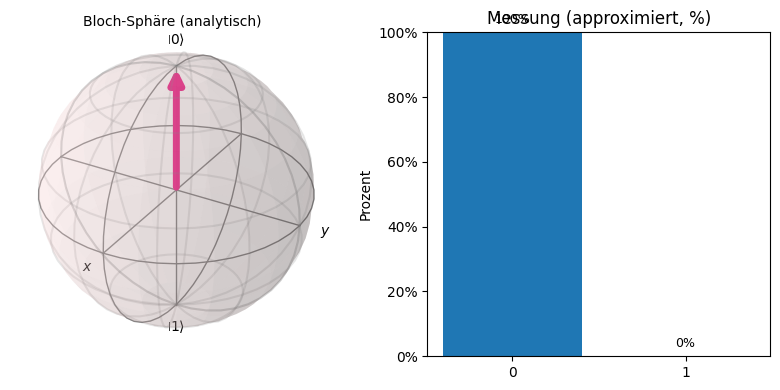

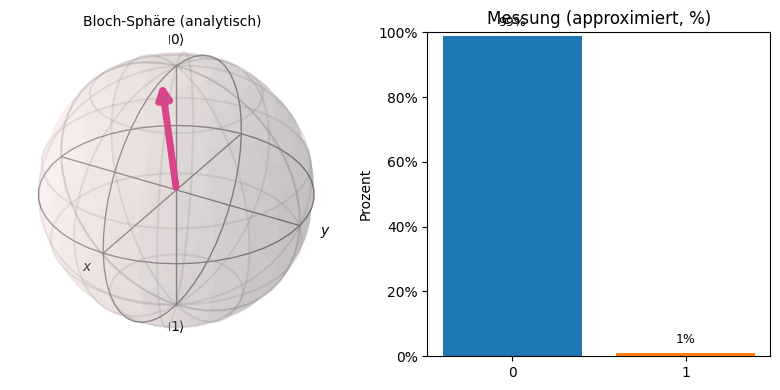

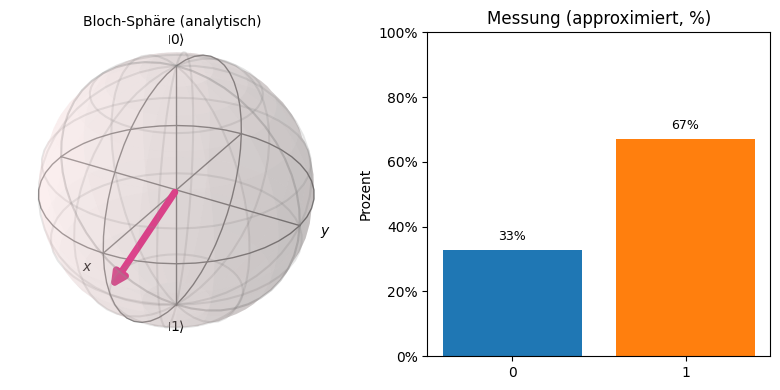

In [ ]:
# Interaktive Bloch-Sphäre (optimiert)
# Jetzt mit Eingabe in Grad (°) für Rx, Ry, Rz – intern automatische Umrechnung in Radiant

from ipywidgets import FloatSlider, IntSlider, ToggleButtons, Button, HBox, VBox, Output
from qiskit.visualization import plot_bloch_vector, plot_histogram
import numpy as np, math

# Simulatoren (nur falls Modus = 'Simulator')
backend_state = Aer.get_backend('statevector_simulator')
backend_qasm = backend  # bereits vorhandener qasm_simulator

# --- Analytische Bloch-Vektor Berechnung für |0> --Rx--> --Ry--> --Rz-->
# Startzustand |0>: Bloch (0,0,1)

def bloch_after_rotations(rx_rad, ry_rad, rz_rad):  # erwartet Radiant
    x, y, z = 0.0, 0.0, 1.0
    if abs(rx_rad) > 1e-12:
        y, z = y*math.cos(rx_rad) - z*math.sin(rx_rad), y*math.sin(rx_rad) + z*math.cos(rx_rad)
    if abs(ry_rad) > 1e-12:
        x, z = x*math.cos(ry_rad) + z*math.sin(ry_rad), -x*math.sin(ry_rad) + z*math.cos(ry_rad)
    if abs(rz_rad) > 1e-12:
        x, y = x*math.cos(rz_rad) - y*math.sin(rz_rad), x*math.sin(rz_rad) + y*math.cos(rz_rad)
    return [x, y, z]

# Widgets (jetzt in Grad – verständlicher für Einsteiger)
# Bereich 0° .. 360° (volle Umdrehung). Schritt 1° für feine Kontrolle.
slider_rx = FloatSlider(min=0, max=360, step=1, value=0, description='X (°)')  # kippt zwischen |0> und |1>
slider_ry = FloatSlider(min=0, max=360, step=1, value=0, description='Y (°)')  # mischt Wahrsch.
slider_rz = FloatSlider(min=0, max=360, step=1, value=0, description='Z (°)')  # ändert Phase
slider_shots = IntSlider(min=50, max=2000, step=50, value=500, description='Messungen')
mode = ToggleButtons(options=['Schnell','Simulator'], description='Modus')
btn_update = Button(description='Aktualisieren', button_style='primary', tooltip='Manuell neu rendern')
output = Output()

help_text = Output()
with help_text:
    print("Erklärung der Regler (Grad):")
    print("- X (°): Rotation um X-Achse. Bewegt Zustand vom Nordpol zum Südpol (ändert Mess-Wahrsch.).")
    print("- Y (°): Rotation um Y-Achse. Ebenfalls Änderung der 0/1-Wahrscheinlichkeiten.")
    print("- Z (°): Rotation um Z-Achse. Ändert NUR die Phase (sichtbar nach Basiswechsel, z.B. via H).")
    print("- Messungen: Anzahl der Wiederholungen zur statistischen Approximation.")
    print("- Modus 'Schnell': Formeln ohne echten Simulator. 'Simulator': echter Statevector + Messung.")
    print("Hinweis: 180° ≙ π Radiant, 360° ≙ 2π Radiant.")

rendering = False

def _plot_percent_hist(prob_dict, title):
    """Hilfsfunktion: plot_histogram auf 0..1 skalieren + Prozent-Achse."""
    from matplotlib.ticker import PercentFormatter
    fig_or_ax = plot_histogram(prob_dict, title=title)
    # plot_histogram kann Figure oder Axes-like zurückgeben
    if hasattr(fig_or_ax, 'axes'):
        ax = fig_or_ax.axes[0]
    else:
        ax = fig_or_ax
    ax.set_ylim(0,1.0)
    ax.set_ylabel('Prozent')
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
    try:
        from IPython.display import display as _display
        if hasattr(fig_or_ax, 'axes'):
            _display(fig_or_ax)
        else:
            _display(ax.figure)
    except Exception:
        pass

# NEU: Bloch-Sphäre + Histogramm NEBENEINANDER (seitliche Anordnung)
from matplotlib.ticker import PercentFormatter as _PF

def _display_bloch_and_hist(bloch_vec, prob_dict, bloch_title, hist_title):
    import matplotlib.pyplot as _plt
    
    # Schließe alle vorherigen Plots um Memory-Leak zu vermeiden
    _plt.close('all')
    
    fig = _plt.figure(figsize=(8,4))
    ax_b = fig.add_subplot(1,2,1, projection='3d')
    ax_h = fig.add_subplot(1,2,2)
    plot_bloch_vector(bloch_vec, title=bloch_title, ax=ax_b)
    p0 = prob_dict.get('0', 0.0)
    p1 = prob_dict.get('1', 0.0)
    bars = ax_h.bar(['0','1'], [p0,p1], color=['#1f77b4','#ff7f0e'])
    ax_h.set_title(hist_title)
    ax_h.set_ylim(0,1.0)
    ax_h.set_ylabel('Prozent')
    ax_h.yaxis.set_major_formatter(_PF(xmax=1, decimals=0))
    for rect,val in zip(bars,[p0,p1]):
        ax_h.text(rect.get_x()+rect.get_width()/2, val+0.02, f"{val*100:.0f}%", ha='center', va='bottom', fontsize=9)
    try:
        fig.tight_layout()
    except Exception:
        pass
    from IPython.display import display as _display
    _display(fig)
    
    # Schließe die Figur nach dem Display um weitere Akkumulation zu vermeiden
    _plt.close(fig)

def render():
    global rendering
    if rendering:  # einfache Reentrancy-Guard
        return
    rendering = True
    with output:
        output.clear_output(wait=True)
        # Werte in Grad einlesen
        rx_deg, ry_deg, rz_deg, shots = slider_rx.value, slider_ry.value, slider_rz.value, slider_shots.value
        # Umrechnung in Radiant für Berechnung / Qiskit Gates
        rx = math.radians(rx_deg)
        ry = math.radians(ry_deg)
        rz = math.radians(rz_deg)
        if mode.value == 'Schnell':
            bloch = bloch_after_rotations(rx, ry, rz)
            z = bloch[2]
            p0 = (1+z)/2
            p1 = 1-p0
            # Wahrscheinlichkeiten direkt (nicht erst Counts → dann normalisieren)
            probs = {'0': p0, '1': p1}
            print(f"Analytisch | Rx={rx_deg:.0f}° Ry={ry_deg:.0f}° Rz={rz_deg:.0f}° -> p(0)≈{p0:.3f} p(1)≈{p1:.3f}")
            qc = QuantumCircuit(1,1)
            if rx: qc.rx(rx,0)
            if ry: qc.ry(ry,0)
            if rz: qc.rz(rz,0)
            try:
                # Schließe vorherige Plots
                import matplotlib.pyplot as plt
                plt.close('all')
                display(qc.draw('mpl'))
            except Exception:
                print(qc.draw())
            _display_bloch_and_hist(bloch, probs, 'Bloch-Sphäre (analytisch)', 'Messung (approximiert, %)')
        else:
            qc = QuantumCircuit(1,1)
            if rx: qc.rx(rx,0)
            if ry: qc.ry(ry,0)
            if rz: qc.rz(rz,0)
            sv = backend_state.run(qc).result().get_statevector(qc)
            a, b = sv[0], sv[1]
            x = 2 * np.real(np.conjugate(a) * b)
            y = 2 * np.imag(np.conjugate(a) * b)
            z = np.abs(a)**2 - np.abs(b)**2
            bloch = [x,y,z]
            qc_m = qc.copy(); qc_m.measure(0,0)
            counts = backend_qasm.run(qc_m, shots=shots).result().get_counts(qc_m)
            # In Wahrscheinlichkeiten normalisieren
            total = sum(counts.values()) or 1
            probs = {k: v/total for k,v in counts.items()}
            print(f"Simulator | Rx={rx_deg:.0f}° Ry={ry_deg:.0f}° Rz={rz_deg:.0f}° -> Prozent: " + 
                  ", ".join(f"{b}={(p*100):.1f}%" for b,p in sorted(probs.items())))
            try:
                # Schließe vorherige Plots
                import matplotlib.pyplot as plt
                plt.close('all')
                display(qc.draw('mpl'))
            except Exception:
                print(qc.draw())
            _display_bloch_and_hist(bloch, probs, 'Bloch-Sphäre (Simulator)', 'Messung (Simulator, %)')
    rendering = False

# Auto-Update bei Slider-Änderungen
for w in (slider_rx, slider_ry, slider_rz, slider_shots, mode):
    w.observe(lambda change: render() if change['name']=='value' else None, names='value')
btn_update.on_click(lambda _: render())

controls = VBox([
    help_text,
    HBox([slider_rx, slider_ry, slider_rz]),
    HBox([slider_shots, mode, btn_update])
])

display(controls)
display(output)  # wichtig: Output anzeigen
render()  # erste Ausgabe

--------------------------------------------------------------------------------------------------------------------

## Kapitel 1: Einfacher Einzel-Qubit-Circuit – Wie oft messen wir 0 oder 1?
Wir erstellen einen Circuit mit 1 Qubit und 1 klassischem Bit. Ein Hadamard-Gatter `H` bringt das Qubit in eine Superposition, sodass bei vielen Messungen ungefähr gleich oft `0` und `1` auftreten. 

**Aufgabe:** Füge das Hadamard-Gatter ein und sieh dir den output an. 

Wenn du das Gatter eingefügt hast makiere die Zelle und drücke auf das Play/Start Symbol oben im Menüband um die Zelle wie auch bisher auszführen.

> Die Schaltung wird für jedes Circuit dargestellt je nachdem welche Gatter du einfügst. So kannst du mit der Schaltungslösung genau sehen ob du es richtig gemacht hast.

Schaltungslösung:

![Kapitel 1 Schaltung](images/kapitel1_schaltung.png)

In [ ]:
# Einfaches Beispiel: 1 Qubit, Hadamard, Messung (gekürzt)
# Du änderst nur shots, den Circuit-Namen und fügst dein Hadamard + Messung ein.
from workshop_utils import run_single_qubit_demo

shots = 100  # Anzahl der Wiederholungen

qc_simple = QuantumCircuit(1,1)  # 1 Qubit, 1 klassisches Bit

# Füge hier das Hadamard-Gatter hinzu:


# Messung (nicht ändern)
qc_simple.measure(0,0)

# Ausführen & Plot (alles weitere passiert in workshop_utils.py)
counts_simple, probs_simple = run_single_qubit_demo(qc_simple, shots, backend)

--------------------------------------------------------------------------------------------------------------------

## Kapitel 2: Wie erzwinge oder beeinflusse ich Messergebnisse?
Wir schauen uns 2 kleine Varianten an (alles noch 1 Qubit):

1. Immer 1 messen: Zustandsvorbereitung durch ein X-Gatter (NOT) vor der Messung.
2. Wahrscheinlichkeiten steuern: Rotation `ry(θ)` – verändert Anteil für 0/1 kontinuierlich.



Der Grundzustand wird immer mit 0 initialisiert.

### Variante 1: Immer 1 erzwingen mit X-Gate
Wir setzen das Qubit per X-Gatter direkt in den Zustand |1>, damit die Messung (fast) immer 1 liefert.

Schaltungslösung:

![Kapitel 2 Schaltung](images/kpaitel2_schaltung.png)

**Aufgabe:** Füge das (NOT) X-Gatter ein und trage in das Quantum Circuit ein Qubit und ein Klassiches Bit ein um den Circuit zu initialisieren.


Wenn du das Gatter eingefügt hasst und das Circuit initialisiert wurde makiere die Zelle und drücke auf das Play/Start Symbol oben im Menüband um die Zelle wie auch bisher auszführen.

> Die Schaltung wird für jedes Circuit dargestellt je nachdem welche Gatter du einfügst. So kannst du mit der Schaltungslösung genau sehen ob du es richtig gemacht hasst. 

In [ ]:
# Variante 1: Immer 1 messen (gekürzt)
# Ergänze NUR: QuantumCircuit Initialisierung + X-Gatter vor der Messung.
from variant_utils import run_variant1_demo, QuantumCircuit

shots = 1000

# Circuit mit 1 Qubit & 1 klassischem Bit anlegen:
qc_one = QuantumCircuit(1,1)

# Füge hier das X-Gatter hinzu, damit der Zustand |1> entsteht:


qc_one.measure(0,0)

# Ausführen & Plot (Rest in variant_utils/workshop_utils)
counts_one, probs_one = run_variant1_demo(qc_one, shots, backend)

--------------------------------------------------------------------------------------------------------------------

### Variante 2: Wahrscheinlichkeiten fein einstellen mit RY(θ)
Mit einer Rotation um die Y-Achse stellen wir kontinuierlich ein, wie oft 0 oder 1 fällt.


Schaltungslösung:

![Kapitel 2 Schaltung (Version 2)](images/kapitel2_schaltungv2.png)

**Aufgabe:** Füge das RY-Gatter ein und trage in das Quantum Circuit ein Qubit und ein Klassiches Bit ein um das Circuit zu initialisieren. 

- Theta (θ) in diesem Beispiel beeinflussed den Pfeil aus der Blochsphere je nach dem welcher Winkel eingestellt wird. 

- Wenn du das Gatter eingefügt hasst und das Circuit initialisiert wurde makiere die Zelle und führe die Zelle aus.

- Wenn du hilfe brauchst um das richtige gatter mit den jeweiligen parametern zu finden scrolle hoch und schau dir die Gatter Tabelle an für RY


<details> <summary><strong>⭐ Bonus Aufgabe (klick)</strong></summary>

Versuche den Winkel Theta (θ) so zu ändern das wir entweder 0 oder 1 als Ergebniss bekommen.

</details>

In [ ]:
# Variante 2: Wahrscheinlichkeiten steuern (gekürzt)
# Ergänze: QuantumCircuit + RY-Gatter mit gewünschtem Winkel (θ).
try:
    from variant_utils import run_variant2_demo, QuantumCircuit
except (ImportError, AttributeError):
    import importlib, variant_utils
    importlib.reload(variant_utils)
    from variant_utils import run_variant2_demo, QuantumCircuit
import math

shots = 500
theta_deg = 60  # Winkel in Grad (änderbar)
theta_rad = math.radians(theta_deg)

qc_bias = QuantumCircuit(1,1)

# RY-Gatter hier hinzufügen, um die Wahrscheinlichkeit für '1' zu beeinflussen:


qc_bias.measure(0,0)

counts_bias, probs_bias = run_variant2_demo(qc_bias, shots, backend, theta_deg=theta_deg)

--------------------------------------------------------------------------------------------------------------------

## Kapitel 3: CNOT (CX) einfach erklärt 2 QUBITS
Das CNOT (CX) hat zwei Qubits:
- Oben: Kontrolle ("Control").
- Unten: Ziel ("Target").

**Regel:** Ist die Kontrolle = 1, dann mache ein X (Flip) auf dem Ziel. Ist die Kontrolle = 0, tue nichts.

Man kann es wie einen "bedingten Lichtschalter" sehen: Control = 1 schaltet den Zustand des Ziel-Qubits um.



>**Aufgabe:** Fülle die '??' aus um die Wahrheitstablle zu vervollständigen. Wenn du nicht weiter weißt lass die untere Code Zelle laufen und schaue dir die Ergebnisse an die wir in den 4 Varianten bekommen. 

>Mit einem doppel Klick kannst du die Tabelle bearbeiten und wenn du sie speichern möchtest führe die Zelle mit dem Play button aus.

### Wahrheitstabelle
| Control | Target (vorher) | Target (nachher) | Ausgabe                     | Was passiert? |
|---------|-----------------|------------------|---------------------------|---------------|
| 0       | 0               | 0                | 00                        | Nichts        |
| 0       | 1               | ?                | ??                        | ?     |
| 1       | 0               | ?                | ??                        | Flip          |
| 1       | 1               | 0                | ??                        | Flip          |




Gleich unten erstellen wir jede der vier Kombinationen und prüfen, was rauskommt. Du musst in diesem Beispiel ***keinen*** Code einfügen. 


In [ ]:
# CNOT Wahrheitstabelle per Simulation
# Wir erzeugen die vier Basiszustände |00>, |01>, |10>, |11>, wenden CX an und messen.


shots = 256
kombinationen = {
    "00": [],
    "01": [(1, 'x')],        # Ziel (unten) auf 1 setzen
    "10": [(0, 'x')],        # Control (oben) auf 1 setzen
    "11": [(0, 'x'), (1, 'x')]  # Beide auf 1 setzen
}

results = {}

for name, ops in kombinationen.items():
    qc = QuantumCircuit(2,2)
    # Vorbereitung
    for qubit, art in ops:
        if art == 'x':
            qc.x(qubit)
    # CX: Kontrolle = Qubit 0, Ziel = Qubit 1
    qc.cx(0,1)
    qc.measure([0,1],[0,1])

    # Circuit zeichnen (so sieht das Gatter in dieser Eingabe aus)
    print(f"\nCircuit für Eingang {name}:")
    try:
        display(qc.draw('mpl'))
    except Exception:
        print(qc.draw())

    counts = backend.run(qc, shots=shots).result().get_counts(qc)
    results[name] = counts
    print(f"Eingang {name} -> Ausgabe Counts: {counts}")

# Zusammenfassung in einer kleinen Tabelle drucken
print("\nZusammenfassung (dominierender Output):")
for eingang, counts in results.items():
    # größten Key finden
    dominant = max(counts.items(), key=lambda kv: kv[1])[0]
    print(f"{eingang} -> {dominant}")

--------------------------------------------------------------------------------------------------------------------

### Kapitel 4: Mini Quantum 1-Bit-Addition

Der Half-Adder addiert zwei klassische Eingaben `a` und `b` (je 0 oder 1) und liefert:
- SUM (Ergebnisstelle)
- CARRY (Übertrag)

In der Quantenvariante nutzen wir 3 Qubits:
- `q0` = a  
- `q1` = b (wird nachher zur SUM umgewandelt)  
- `q2` = startet in |0⟩ und speichert später den Carry  

Hinweis: Wenn du die vollständige Erklärung sehen möchtest, führe in einer Code-Zelle aus:

> Optional: Nutze diese Hilfe nur, wenn du feststeckst – versuche vorher selbst den Ablauf zu rekonstruieren.

***Aufgabe:*** 

Erstelle einen Taschenrechner, der addieren kann: x1 + x2 = y1 & y2 (binäre Darstellung)
Klassisch kann dies mit folgenden Gattern durchgeführt werden:

<img src="images/gatterclassic.png" alt="classigatter" width="350" />


<details> <summary><strong>❇️ Quanten Gatter die auch im Klassischen Sinne äquivalent sind (klicken)</strong></summary>


***Quanten Gatter*** 

<img src="images/quanten_gatter.png" alt="Quanten-Gatter Übersicht" width="450" />

</details>

<details> <summary><strong>👉 Weitere Hilfe (klicken)</strong></summary>

Ablauf:

    1. Setze Eingaben: Falls `a=1` dann `x(0)`, falls `b=1` dann `x(1)`.
    2. `ccx(q0, q1, q2)` schreibt `a AND b` in `q2` (Carry).
    3. `cx(q0, q1)` macht aus `q1` nun `a XOR b` (Sum).
    4. Messe `q1` (Sum) und `q2` (Carry).

    Warum das funktioniert:
    - CNOT implementiert XOR (Ziel wechselt nur wenn Control=1).
    - Toffoli (CCX) implementiert AND (Ziel wird nur 1 wenn beide Controls 1 sind).
    - Damit haben wir die klassische Logik exakt nachgebildet.
      (Siehe Wahrheitstabelle aus dem vorherigen Kapitel.)

    Bitstring-Hinweis:
    - Beispiel: `10` bedeutet CARRY=1, SUM=0 ⇒ Ergebnis 2 (1+1).

    Kernidee:
    - Quantengatter erlauben parallele Zustände; hier nutzen wir sie rein klassisch
      (keine Superposition nötig), aber dieselben Gatter sind Bausteine größerer
      arithmetischer Quanten-Schaltungen.

</details>

***Aufgabe:*** Kapitel ***4*** 
>Probieren zu erst das Problem selber zu Lösen bevor du dir die Lösung anschaust. Trage nun den Code in die untere Zelle ein.

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

#Eingaben
a = 1
b = 1

#Vervollständige den code um einen Quanten addierer zu bauen.

# Quantencircuit Initialiseren
qc =  # 3 Qubits und 2 Klassiche bits

#Unter diesem Kommentar schreibst du die gatter und den Code hin.



backend = AerSimulator()
counts = backend.run(transpile(qc, backend), shots=512).result().get_counts()
display(qc.draw('mpl'))
plot_histogram(counts)

***Lösung: Kapitel 4*** Wenn du nicht weiter kommst zeigen wir dir auch die Lösung.
<details> <summary><strong>✅ Lösung anzeigen (klicken)</strong></summary>

qc = QuantumCircuit(3, 2)

qc.x(0)

qc.x(1)

qc.ccx(0,1,2)

qc.cx(0,1)

qc.measure(1,0)

qc.measure(2,1)

</details>

--------------------------------------------------------------------------------------------------------------------

### Kapitel: 5 - Baue eigenständig einen Algorithmus 

***BONUS: Deutsch Algorithmus – Erkenne mit einer Abfrage ob eine Funktion konstant oder balanciert ist***

Der (klassische) Vergleich: Um sicher festzustellen, ob eine Boolesche Funktion f:{0,1}→{0,1} konstant (immer 0 oder immer 1) oder balanciert (einmal 0, einmal 1) ist, müsstest du im Worst Case beide Eingaben testen (f(0) und f(1)).

Der Deutsch Algorithmus schafft das mit nur EINER quantenmechanischen Orakel-Abfrage.

***Ziel:*** Implementiere selbst einen Circuit, der nach einer einzelnen Anwendung des Orakels entscheidet: "konstant" oder "balanciert".



***Warum funktioniert das? (Kurz intuitiv)***
- Das zweite Qubit im |−⟩ Zustand sorgt dafür, dass f(x) als Phase (−1)^{f(x)} am ersten Qubit "kodiert" wird.
- Das abschließende Hadamard auf Qubit 0 interferiert die Phasen: Gleiche Phase (konstant) → |0⟩, unterschiedliche Phase (balanciert) → |1⟩.

<img src="images/deutschalgo.png" alt="Quanten-Gatter Übersicht" width="750" />

>Hinweise :
- Hadamard: qc.h(qubit)
- X für konstante-1-Variante im Orakel: Ziel-Qubit flippen (kontroll-unabhängig) oder separater Ansatz.
- Für f(x)=x kannst du eine CNOT von x→Ziel benutzen.
- Achte auf die Reihenfolge der Messung: Nur erstes Qubit entscheidet.




In [ ]:
# Imports für den Deutsch-Algorithmus
# (Minimal und neutral – eigentliche Orakel- und Algorithmus-Implementierung bleibt deine Aufgabe.)
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Optional nützlich:
import random  # falls du ein zufälliges Orakel wählen willst



